In [4]:
from analysis_ import AnalysisTargets, ClusterFinancials
from data import FinancialsData
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap

In [5]:
cf = ClusterFinancials()
gmm = list(cf.gmm.cluster())

# gmm_cov = cf.gmm.cluster_cov()
# gmm_weights = cf.gmm.weights()

# print(gmm_weights)

In [21]:
s_df = pd.read_csv('symbol_fundamentals.csv').set_index('symbol')
#print(s_df)




#print(gmm)
cluster_count = max(set([i[1] for i in gmm]))
gmm_dict = dict()
for i in range(0, cluster_count + 1):
    gmm_dict[i] = []    
for i in gmm:
    gmm_dict[i[1]].append(i[0])
for k in gmm_dict:
    df = pd.DataFrame()
    at = AnalysisTargets()
    for symbol in gmm_dict[k]:
        df = pd.concat([df, at.create_target_dataset(symbol)])
        s_df.loc[symbol,'cluster'] = k
    #print(f"Cluster {k+1}:\n{gmm_dict[k]}")
    #print(df.describe())
    

s_df = s_df.drop(['Description', 'Sector', 'Industry', 'asOfDate'], axis = 1).groupby(['cluster']).agg(['mean', 'std', 'count'])
    
    
#sns.barplot(data=s_df, x="cluster", y="body_mass", hue="sex")


DilutedEPS                  NormalizedEBITDA                      \
              mean        std count             mean           std count   
cluster                                                                    
0.0       5.879868   6.239711    68     2.887745e+09  3.141413e+09    68   
1.0      15.248750  90.298203    16    -1.835172e+08  2.335674e+09    16   
2.0       7.225758   4.793504    11     2.123717e+10  8.706278e+09    11   
3.0      -6.410000        NaN     1    -1.471149e+09           NaN     1   

         TotalRevenue                         MarketCap  ... RevenueYoY2021  \
                 mean           std count          mean  ...          count   
cluster                                                  ...                  
0.0      1.397457e+10  1.207345e+10    68  3.688672e+10  ...             68   
1.0      5.475690e+09  3.873031e+09    16  2.254294e+10  ...             16   
2.0      1.190861e+11  5.672121e+10    11  1.800592e+11  ...             11   
3.0      2.711100e+07           NaN     1  1.423400e+10  ...              1   

        RevenueYoY2022                       PeRatio                    \
                  mean         std count        mean         std count   
cluster                                                                  
0.0          10.903739   13.869253    68   19.923746   41.578965    68   
1.0         117.659149  203.188536    16 -138.569427  280.094693    16   
2.0          16.228168   13.797332    11   32.671370   61.229254    11   
3.0        2143.299768         NaN     1   -5.936037         NaN     1   

        AvgSentiment2022                  
                    mean       std count  
cluster                                   
0.0             0.106179  0.040368    68  
1.0             0.115306  0.046308    16  
2.0             0.132793  0.033971    11  
3.0             0.161305       NaN     1  

[4 rows x 30 columns]

## T-SNE (Base Model)

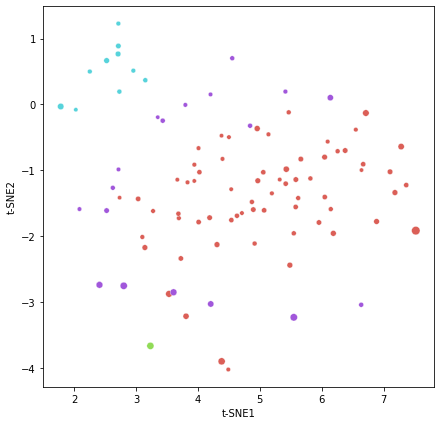

In [64]:
fd = FinancialsData()
results = cf.tsne.reduce(perplexity=55, n_iter=5000)
df_1 = pd.DataFrame(columns=["t-SNE1", "t-SNE2", "AvgVolatility", "Sector", "Cluster", "Industry"])
df_1["t-SNE1"] = results[:, 0]
df_1["t-SNE2"] = results[:, 1]
#print(df_1['t-SNE1'])
#df["MarketCap"] = fd.get_yfinance_data()["DilutedEPS"]
df_1["Sector"] = fd.get_yfinance_data()["Sector"]
df_1["Industry"] = fd.get_yfinance_data()["Sector"]
df_1["Symbol"] = fd.get_yfinance_data().symbol

#cf.gmm.cluster(n_components=4)
#print(list(cf.gmm.cluster(n_components=4)))

cluster_assignments = [i[1] for i in cf.gmm.cluster(n_components=4)]
for k, v in cf.gmm.cluster(n_components=4):
     df_1.loc[(df_1["Symbol"] == k), "Cluster"] = v
for i in df_1["Symbol"]:
    at = AnalysisTargets()
    mean = at.create_target_dataset(i)['Deviation'].mean()
    df_1.loc[(df_1["Symbol"] == i), "AvgVolatility"] = mean
    
    
num_colors = len(set(df_1["Cluster"]))
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="t-SNE1",
    y="t-SNE2",
    hue="Cluster",
    size="AvgVolatility",
    data=df_1,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()

In [65]:
pd.set_option('display.max_rows', None)
ideal_clusters = cf.gmm.cluster_probabilities(n_components = 4)
ideal_clusters
# cf.gmm.ideal_cluster_num()

,Component0,Component1,Component2,Component3
TSLA,0.000,0.0,1.0,0.000
PG,0.000,0.0,1.0,0.000
HD,0.000,0.0,1.0,0.000
MCD,0.000,0.0,0.0,1.000
TM,0.000,0.0,1.0,0.000
NKE,0.000,0.0,0.0,1.000
PM,0.000,0.0,0.0,1.000
LOW,0.000,0.0,1.0,0.000
SONY,0.000,0.0,1.0,0.000
SBUX,0.030,0.0,0.0,0.970


#why GMM
GMM is very useful here. 

Compared to K-means it can capture more complicated normal distributions of the data, whereas K-means
largely targets spherical shapes in the data.

We also expect clusters to have varying densities and sizes. For example, we expect most stocks to be associated with neutral performance, and some stocks associated with positive and negative performance. GMM tends to perform quite well in these conditions, whereas K-means and DBSCAN will typically struggle here. 

Lastly, it makes intuitive sense to assign soft-clustering for our purposes. If the latent variables are associated with investor sentiment/performance then we expect many stocks, probability wise, to fall into multiple different clusters.



#We used BIC to determine the ideal number of clusters. This is an effective feature evaluation method because it can control for overfitting while maximizing log-likelihood. BIC determined that the ideal number of clusters for GMM is 4 clusters.

In [66]:
cf_with_sentiment = ClusterFinancials(sentiment=True)



print(cf_with_sentiment.gmm.ideal_cluster_num())
cf_with_sentiment.gmm.cluster_probabilities(n_components=3)


3


,Component0,Component1,Component2
TSLA,0.000,0.0,1.000
PG,0.000,0.0,1.000
HD,0.000,0.0,1.000
MCD,0.000,0.0,1.000
TM,0.000,0.0,1.000
NKE,0.000,0.0,1.000
PM,0.000,0.0,1.000
LOW,0.000,0.0,1.000
SONY,0.000,0.0,1.000
SBUX,0.000,0.0,1.000


## T-SNE with Cluster Sentiments

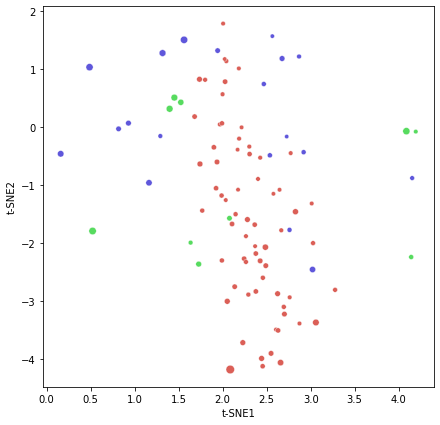

In [71]:
cf_with_sentiment = ClusterFinancials(sentiment=True)
results = cf_with_sentiment.tsne.reduce(perplexity=55, n_iter=5000)
df_1 = pd.DataFrame(columns=["t-SNE1", "t-SNE2", "AvgVolatility", "Sector", "Cluster", "Industry"])
df_1["t-SNE1"] = results[:, 0]
df_1["t-SNE2"] = results[:, 1]
df_1["Sector"] = cf_with_sentiment.get_yfinance_data()["Sector"]
df_1["Industry"] = cf_with_sentiment.get_yfinance_data()["Sector"]
df_1["Symbol"] = cf_with_sentiment.get_yfinance_data().symbol


cluster_assignments = [i[1] for i in cf_with_sentiment.gmm.cluster(n_components = 3)]
for k, v in cf_with_sentiment.gmm.cluster(n_components = 3):
    df_1.loc[(df_1["Symbol"] == k), "Cluster"] = v

for i in df_1["Symbol"]:
    at = AnalysisTargets()
    mean = at.create_target_dataset(i)['Deviation'].mean()
    df_1.loc[(df_1["Symbol"] == i), "AvgVolatility"] = mean

num_colors = 3
plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="t-SNE1",
    y="t-SNE2",
    hue="Cluster",
    size="AvgVolatility",
    data=df_1,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()


## UMAP (Base Model)

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score


# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [10, 20, 30, 40, 50],
    'min_dist': [0.1, 0.2, 0.3, 0.4, 0.5]
}

reducer = umap.UMAP(random_state=42)

def umap_silhouette_scorer(estimator, X):
    embeddings = estimator.transform(X)
    labels = estimator.gmm.fit_predict(embeddings)
    return silhouette_score(embeddings, labels)


In [100]:
# Perform grid search
grid_search = GridSearchCV(reducer, param_grid, cv = 5, scoring = umap_silhouette_scorer)
grid_search.fit(cf.umap.reduce())
print(grid_search.best_estimator_)

UMAP(n_neighbors=10, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})


In [101]:
# Get the best UMAP model from grid search
best_reducer = grid_search.best_estimator_


# Perform UMAP dimensionality reduction
results_base = best_reducer.transform(cf.umap.reduce())

print(len(results_base[:,0]))

df_1["UMAP1"] = results_base[:, 0]
df_1["UMAP2"] = results_base[:, 1]


96


In [102]:
num_colors = 4
cluster_assignments = [i[1] for i in cf.gmm.cluster(n_components = 4)]
for k, v in cf.gmm.cluster(n_components = 4):
    df_1.loc[(df_1["Symbol"] == k), "Cluster"] = v

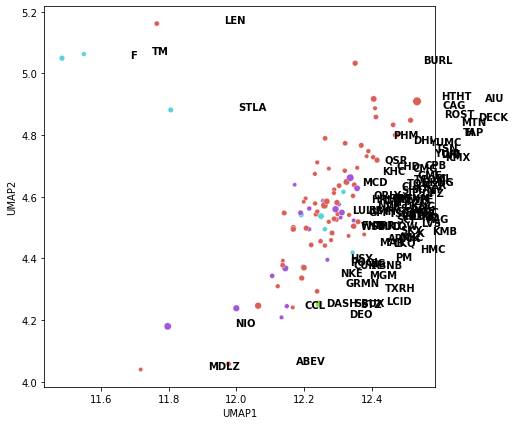

In [103]:
plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="Cluster",
    size="AvgVolatility",
    data=df_1,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
    
)

In [ ]:
outliers = 

for stock_index in range(len(df_1.index)):
     plt.text(df_1.iloc[stock_index]['UMAP1'] + 0.2, df_1.iloc[stock_index]['UMAP2'], df_1.iloc[stock_index]['Symbol'], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
            
plt.show()

In [94]:
print(grid_search.best_params_)

{'min_dist': 0.1, 'n_neighbors': 10}


## UMAP (Sentiment Model)


In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

reducer = umap.UMAP(random_state=42)

# Perform grid search
#import pdb; pdb.set_trace()
grid_search_sent = GridSearchCV(reducer, param_grid, scoring = umap_silhouette_scorer)
grid_search_sent.fit(cf_with_sentiment.umap.reduce())
print("Best Silhouette Score:", grid_search_sent.best_params_)

Best Silhouette Score: {'min_dist': 0.1, 'n_neighbors': 10}


In [105]:
# Get the best UMAP model from grid search
best_reducer_sent = grid_search_sent.best_estimator_


# Perform UMAP dimensionality reduction
results_sent = best_reducer_sent.transform(cf_with_sentiment.umap.reduce())


df_2 = pd.DataFrame()
df_2["UMAP1"] = results_sent[:, 0]
df_2["UMAP2"] = results_sent[:, 1]

for i in df_2["Symbol"]:
    at = AnalysisTargets()
    mean = at.create_target_dataset(i)['Deviation'].mean()
    df_2.loc[(df_2["Symbol"] == i), "AvgVolatility"] = mean

KeyError: 'Symbol'

In [ ]:
num_colors = 4
cluster_assignments = [i[1] for i in cf_with_sentiment.gmm.cluster(n_components = 4)]
for k, v in cf_with_sentiment.gmm.cluster(n_components = 4):
    df_2.loc[(df_2["Symbol"] == k), "Cluster"] = v

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="Cluster",
    size="AvgVolatility",
    data=df_2,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()

In [ ]:
print(grid_search_sent.best_params_)